In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
from descartes import PolygonPatch

In [2]:
from dorchester import dotdensity

In [5]:
import fiona

In [12]:
from shapely.ops import unary_union
from shapely.geometry import shape

In [3]:
BLUE = '#6699cc'
GRAY = '#999999'

In [4]:
SUFFOLK = "../tests/data/suffolk.geojson"

In [45]:
def plot(feature, points):
    coords = [(p[0], p[1]) for p in points]
    x, y = zip(*coords)
    plt.plot(*zip(*feature['geometry']['coordinates'][0]))
    plt.scatter(x, y, s=.5)

In [7]:
with fiona.open(SUFFOLK) as src:
    print(len(src))

9170


In [13]:
with fiona.open(SUFFOLK) as src:
    blocks = [shape(f["geometry"]) for f in src]
    boundary = unary_union(blocks)

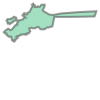

In [22]:
boundary

In [38]:
with fiona.open(SUFFOLK) as src:
    block = next(b for b in src if b['properties']['POP10'] > 0)

In [41]:
block

{'type': 'Feature',
 'id': '1',
 'properties': OrderedDict([('id', '126596'),
              ('BLOCKCE', '1019'),
              ('BLOCKID10', '250251304041019'),
              ('COUNTYFP10', '025'),
              ('HOUSING10', 14),
              ('PARTFLG', 'N'),
              ('POP10', 45),
              ('STATEFP10', '25'),
              ('TRACTCE10', '130404')]),
 'geometry': {'type': 'Polygon',
  'coordinates': [[(-71.157072, 42.261327),
    (-71.157196, 42.26181),
    (-71.157279, 42.262166),
    (-71.15749, 42.263064),
    (-71.15752499999999, 42.263183999999995),
    (-71.157609, 42.263433),
    (-71.157761, 42.263738),
    (-71.157552, 42.263797),
    (-71.15745199999999, 42.263785999999996),
    (-71.157381, 42.263743),
    (-71.15720999999999, 42.263616),
    (-71.156892, 42.263312),
    (-71.156545, 42.263016),
    (-71.15630399999999, 42.26282),
    (-71.15590999999999, 42.262544999999996),
    (-71.156427, 42.26201),
    (-71.157072, 42.261327)]]}}

In [42]:
points, err = dotdensity.points_in_feature(block, 'POP10')

In [44]:
points

[Point(x=-71.15760992411079, y=42.26375407803927, group='POP10', fid='1'),
 Point(x=-71.1573082685285, y=42.263577348370376, group='POP10', fid='1'),
 Point(x=-71.15745681746526, y=42.263363613728956, group='POP10', fid='1'),
 Point(x=-71.15730998344776, y=42.26333378838997, group='POP10', fid='1'),
 Point(x=-71.15718177159306, y=42.263481882619395, group='POP10', fid='1'),
 Point(x=-71.15721893913937, y=42.26337172054786, group='POP10', fid='1'),
 Point(x=-71.1563521219469, y=42.26213249570502, group='POP10', fid='1'),
 Point(x=-71.15633212405925, y=42.26242428371555, group='POP10', fid='1'),
 Point(x=-71.1562156811409, y=42.26253266225972, group='POP10', fid='1'),
 Point(x=-71.15621027068491, y=42.26230036996939, group='POP10', fid='1'),
 Point(x=-71.15705355738785, y=42.26140959790634, group='POP10', fid='1'),
 Point(x=-71.15701159556856, y=42.26179828147063, group='POP10', fid='1'),
 Point(x=-71.15713171979395, y=42.26170246337625, group='POP10', fid='1'),
 Point(x=-71.157070514681

In [47]:
err

Error(offset=-1, group='POP10', fid='1')

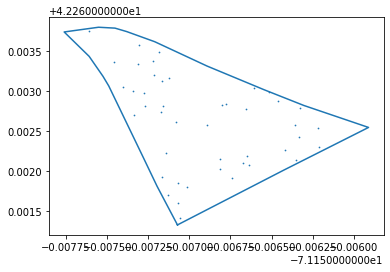

In [46]:
plot(block, points)